In [4]:
%config Completer.use_jedi = False

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
 
from pylab import rcParams
 
#from imblearn.under_sampling import NearMiss
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.combine import SMOTETomek
#from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter

In [11]:
X_train = np.load("X_train.npy")
X_val   = np.load("X_val.npy")
X_test = np.load("X_test.npy")
Y_train = np.load("Y_train.npy")
Y_val   = np.load("Y_val.npy")
Y_test  = np.load("Y_test.npy")

print("X_train: %s" %str(X_train.shape))
print("X_val: %s" %str(X_val.shape))
print("X_test: %s" %str(X_test.shape))
print("Y_train: %s" %str(Y_train.shape))
print("Y_val: %s" %str(Y_val.shape))
print("Y_test: %s" %str(Y_test.shape))

X_train: (2050, 3, 176, 176)
X_val: (439, 3, 176, 176)
X_test: (439, 3, 176, 176)
Y_train: (2050, 176, 176)
Y_val: (439, 176, 176)
Y_test: (439, 176, 176)


In [49]:
439*176*176*3

40795392

In [56]:
abc1 = np.empty((3,2050,176,176))
abc2 = np.empty((3,439,176,176))
a = Y_train
b = Y_train
c = Y_train
abc1[0] = a
abc1[1] = b
abc1[2] = c

aa = Y_test
bb = Y_test
cc = Y_test
abc2[0] = aa
abc2[1] = bb
abc2[2] = cc

X_train_2d = X_train.reshape(2050*3*176*176)
X_test_2d = X_test.reshape(439*3*176*176)
Y_train_2d = abc1.reshape(2050*3*176*176)
Y_test_2d = abc2.reshape(439*3*176*176)

X_train_2d=X_train_2d.reshape(-1,1)
X_test_2d= X_test_2d.reshape(-1,1)

X_train_2d.shape

(190502400, 1)

In [57]:
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train_2d, X_test_2d, Y_train_2d, Y_test_2d):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train_2d, Y_train_2d)
    return clf_base
 
#ejecutamos el modelo "tal cual"
model = run_model(X_train_2d, X_test_2d, Y_train_2d, Y_test_2d)

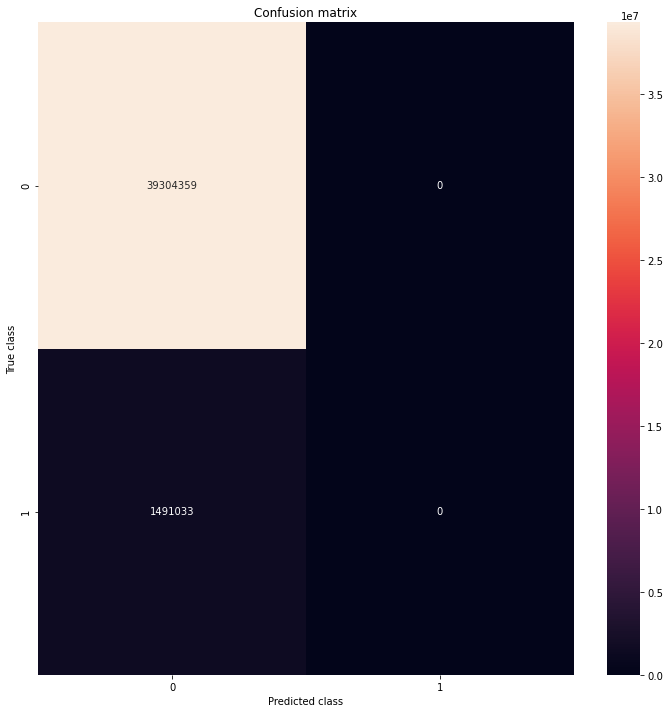

/home/joaquinfunes/miniconda3/envs/tesis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joaquinfunes/miniconda3/envs/tesis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98  39304359
         1.0       0.00      0.00      0.00   1491033

    accuracy                           0.96  40795392
   macro avg       0.48      0.50      0.49  40795392
weighted avg       0.93      0.96      0.95  40795392



/home/joaquinfunes/miniconda3/envs/tesis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
predije = ["0", "1"]

 
#definimos funciona para mostrar los resultados
def mostrar_resultados(Y_test, pred_y):
    conf_matrix = confusion_matrix(Y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=predije, yticklabels=predije, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(Y_test, pred_y))


pred_y = model.predict(X_test_2d)
mostrar_resultados(Y_test_2d, pred_y)